<center>
<h1>Does CBLoL's Teams Really Plays Less Matches? </h1>
<h3>Analysing Statistics About <b>LoL Competitive Macthes</b></h3><br>
<body>
    **THIS IS A WORK IN PROGRESS** <br>
    I'm a begginer in Data Science, so I'm working in this analysis to learn some stuff about data analysis.
        Brazil's LoL fans complain that here we play just a few matches, and that is probably a reason for our bad results in the World's Championships. <br> 
    So, I decided to analyze the teams who played the most games in their respective league, according to this dataset.<br>
    In the final, I made some cool analysis about the win rate of players, champions and teams, most used champions, etc...<br>
    If you read this, please give some feedaback and suggestions!



</center>

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [121]:
lol = pd.read_csv('LeagueofLegends.csv')

lol = lol.drop('Address', axis = 1) 
#The match history is not very useful, for now, in this analysis.
lol.head()

LCK      1323
NALCS    1115
EULCS     941
LMS       716
TCL       634
OPL       441
WC        308
CBLoL     282
LCL       281
LJL       258
LLN       242
CLS       167
IEM       138
MSI       111
RR        101
Name: League, dtype: int64

<center>
It's interesting to notice that the fastest game had 17 minutes, and the longest 81. <br>
The mean is about 36 minutes.
</center>

In [8]:
lol.describe()#Here we do a little statics describe

,Year,bResult,rResult,gamelength
count,7058.000000,7058.000000,7058.000000,7058.000000
mean,2016.236611,0.544772,0.455228,36.941910
std,0.795949,0.498027,0.498027,7.924203
min,2014.000000,0.000000,0.000000,17.000000
25%,2016.000000,0.000000,0.000000,31.000000
50%,2016.000000,1.000000,0.000000,36.000000
75%,2017.000000,1.000000,1.000000,41.000000
max,2017.000000,1.000000,1.000000,81.000000


<center>
Let's plot the graph of the frequency of game length on a line chart.
</center>

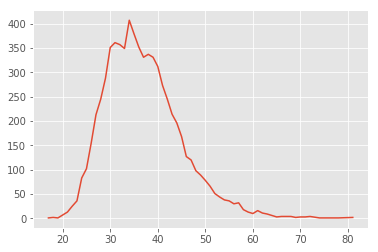

In [9]:
lol['gamelength'].value_counts().sort_index().plot()

<center>
A histogram would be interesting too.
</center>

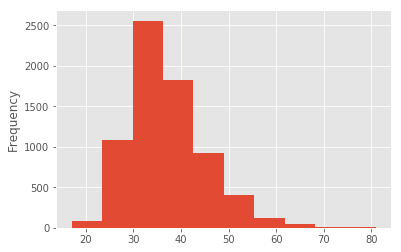

In [10]:
lol['gamelength'].plot.hist()

Let's see what are the longest and fastest game that we have in this dataset:

In [11]:
lol[lol['gamelength']>80]

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp
1510,EULCS,2016,Summer,Season,OG,1,0,FNC,81,sOAZ,...,Gamsu,Trundle,Spirit,RekSai,Febiven,Viktor,Rekkles,Ezreal,YellOwStaR,Nami
2115,LCK,2015,Spring,Season,JAG,1,0,CJE,81,TrAce,...,Shy,Maokai,Ambition,JarvanIV,Coco,Jayce,Space,Corki,MadLife,Nami


Ok, the longests games is both one of EU LCS in 2016 between fNatic and Origen, if you want, you can watch it <a href="https://www.youtube.com/watch?v=ExgH8dlbh0s" >here.</a> <br>
And the other were between Jin Air Wing and CJ Entus, but I couldn't find the link.

In [12]:
lol[lol['gamelength']<18]

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTop,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp
4946,TCL,2017,Summer,Season,FB,1,0,CLK,17,Thaldrin,...,Smoke,Kled,Kadir,Nocturne,umuut,Vladimir,DarkSide,Kalista,un1tback,Braum


The fastest game was in Turkey, between Çilekler and Fenerbahçe , and you can watch it <a href="https://www.youtube.com/watch?v=8D7YjcMi5nw"> here</a>

In [13]:
lol.dtypes #here we see that we'll not have problems with the types

League              object
Year                 int64
Season              object
Type                object
blueTeamTag         object
bResult              int64
rResult              int64
redTeamTag          object
gamelength           int64
blueTop             object
blueTopChamp        object
blueJungle          object
blueJungleChamp     object
blueMiddle          object
blueMiddleChamp     object
blueADC             object
blueADCChamp        object
blueSupport         object
blueSupportChamp    object
redTop              object
redTopChamp         object
redJungle           object
redJungleChamp      object
redMiddle           object
redMiddleChamp      object
redADC              object
redADCChamp         object
redSupport          object
redSupportChamp     object
dtype: object

<center>
<body >
<font size = 3>
So here it's where I plot the bars for the top teams who played the most games in each local league. <br>
It was really difficult for me to think how I could do this and add the correct label for each team.
What I thought was:<br>
If I do a **general bar graph** with the correct order of the teams, then I make a copy of this general graph and **plot each region graph** on a copy. Ok, did you get it? Now the rest is easy, I just plot the graphs and everything looks beautiful.
</font>
</body>
</center>

In [14]:
lol2016 = lol[lol['Year'] >= 2016] 
#2016 It's when the CBLOL starts to get recorde on the dataset.

#Here I make the graphs of each region.
lcsna = lol2016[lol2016['League'] == 'NALCS']

lcseu = lol2016[lol2016['League'] == 'EULCS']

lck = lol2016[lol2016['League'] == 'LCK']

lms = lol2016[lol2016['League'] == 'LMS']

cblol = lol2016[lol2016['League'] == 'CBLoL']

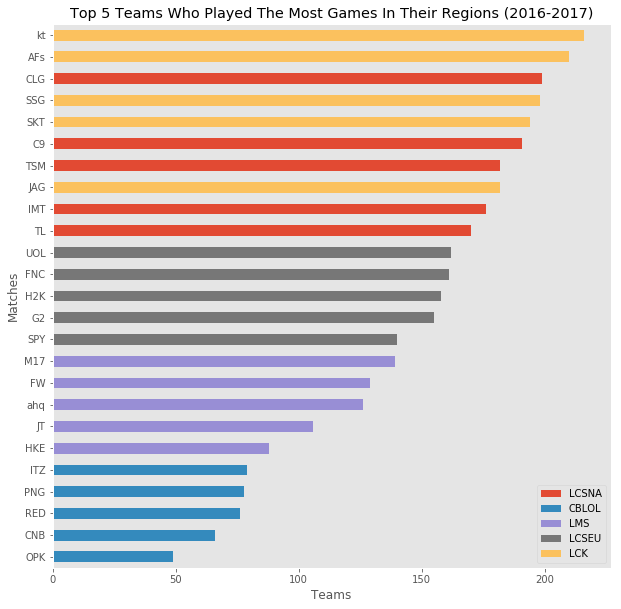

In [34]:
top = 5 #Here it's a variable so I can change How many teams of each region I want to see.

leagues = {
'CBLOL': (cblol['blueTeamTag'].value_counts() + cblol['redTeamTag'].value_counts()).sort_values(ascending = False).head(top),
'LCSNA': (lcsna['blueTeamTag'].value_counts() + lcsna['redTeamTag'].value_counts()).sort_values(ascending = False).head(top),
'LCSEU': (lcseu['blueTeamTag'].value_counts() + lcseu['redTeamTag'].value_counts()).sort_values(ascending = False).head(top),
'LCK': (lck['blueTeamTag'].value_counts() + lck['redTeamTag'].value_counts()).sort_values(ascending = False).head(top),
'LMS': (lms['blueTeamTag'].value_counts() + lms['redTeamTag'].value_counts()).sort_values(ascending = False).head(top),
}

allGames = pd.DataFrame()

total = pd.Series()
total.name = 'total'

for i in leagues:
    leagues[i].name=i
    allGames = allGames.append(leagues[i]).fillna(0)
    total = total.append(leagues[i])
    
allGames = allGames.transpose()

allGames['total'] = total
allGames = allGames.sort_values('total')
allGames = allGames.drop('total', axis = 1)

allGames.plot.barh(figsize = (10,10), grid = False, stacked = True)

plt.title('Top %s Teams Who Played The Most Games In Their Regions (2016-2017)' % top)
plt.ylabel('Teams')
plt.xlabel('Matches')
plt.legend()

<center>
<body >
<font size = 4>
Analysing this, it's obviously that the number of matches played can affect on the international perfomances, since the brazillian team who played the most, INTZ, it's not even close to the LCK team who played the less (of the top 8).
Fortunately, Riot Games Brazil <a href = "https://www.maisesports.com.br/cblol-2018-tera-novo-formato-com-md3/"> already annouced that the format will change in 2018. </a> <br>
Let's see if this will help the brazillian players to have a better perfomance on International Events, such as we see on CS:GO, where the brazillians are known to be one of the strongests players.
</font>
</body>
</center>

<center>
<h1>
<font size = 4>
Statistics about champions & players
</font>
</h1>
<body >
<font size = 4>
Now, lets just view some statistics about the champions and players.
</font>
</body>
</center>

In [177]:
champions = lol2016.loc[:, 'blueTopChamp':'redSupportChamp']
aux = 0
for i in champions:
    
    if 'Champ' not in i:
        champions = champions.drop(i, axis = 1) 
    else:
        aux += champions[i].value_counts()

a = pd.Series()
for i in champions:
    a = (a+champions[i].value_counts().sort_values(ascending=False)).fillna(0)
    
a[:] = 0
champs = a.copy()
for i in champions:
    champs = champs+(a+champions[i].value_counts().sort_values(ascending=False)).fillna(0)
    
print(champs.sort_values(ascending = False).head(10))
"""
for i in champions:
    if 'Gragas' in champions[i].value_counts():
        print(champions[i].value_counts()['Gragas'])
"""
champs = champs.sort_values(ascending = False)
champs.values.sum()

Gragas    1906.0
Elise     1823.0
Braum     1729.0
RekSai    1581.0
Karma     1561.0
Ashe      1443.0
Lucian    1343.0
Jhin      1340.0
Varus     1326.0
Thresh    1225.0
dtype: float64


56160.0

Text(0.5,0,u'Champion')

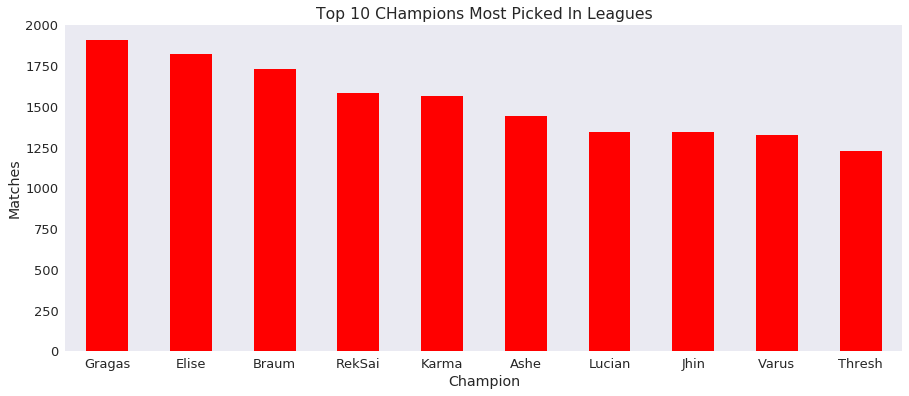

In [79]:
champs.head(10).plot(kind = 'bar', figsize=(15,6), grid = False, rot = 0, color = 'red')

plt.title('Top 10 Champions Most Picked In Leagues')
plt.ylabel('Matches')
plt.xlabel('Champion')

Elise     113.0
Braum     106.0
RekSai     96.0
Lucian     95.0
Gragas     76.0
Karma      74.0
Thresh     71.0
Varus      68.0
Poppy      65.0
Ezreal     65.0
dtype: float64


Text(0.5,0,u'Campeao')

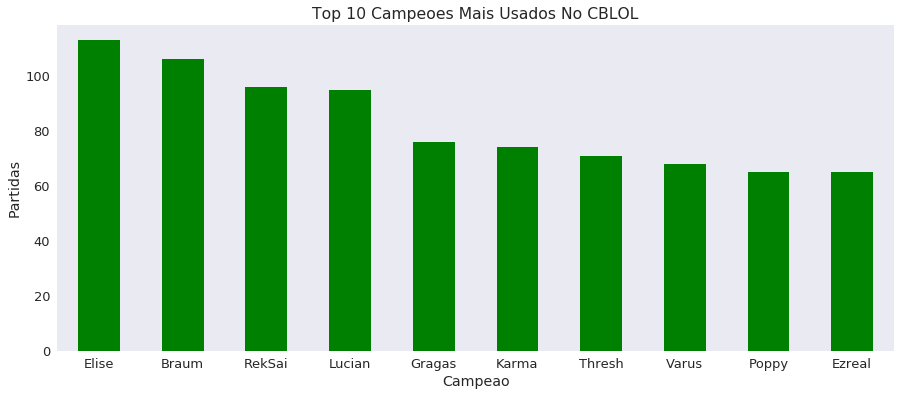

In [80]:
champions = cblol.loc[:, 'blueTopChamp':'redSupportChamp']

for i in champions:
    
    if 'Champ' not in i:
        champions = champions.drop(i, axis = 1) 
    else:
        aux += champions[i].value_counts()

a = 0
for i in champions:
    a=a+champions[i].value_counts().sort_values(ascending=False)

a = a.fillna(0)
championsCblol = 0
for i in champions:
    championsCblol+=(a+champions[i].value_counts().sort_values(ascending=False)).fillna(0)

print(championsCblol.sort_values(ascending = False).head(10))
championsCblol = championsCblol.sort_values(ascending = False)

championsCblol.head(10).plot(kind = 'bar', figsize=(15,6), grid = False, rot = 0, color = 'green')

plt.title('Top 10 Champions Most Used In CBLOL')
plt.ylabel('Matches')
plt.xlabel('Champion')

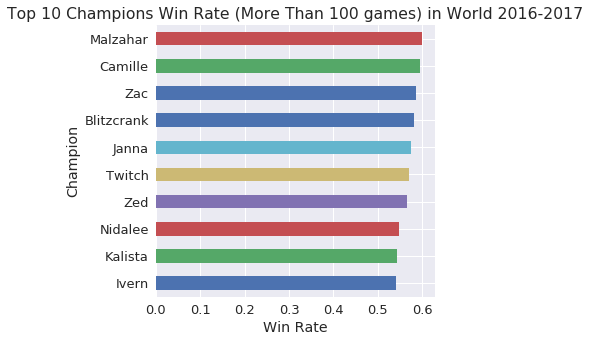

In [114]:
shape = 0
for i in champions:
    if 'blue' in i:
        shape = shape + pd.crosstab( lol2016[i] ,lol2016['bResult']).fillna(0)
    if 'red' in i:
        shape = shape + pd.crosstab( lol2016[i] ,lol2016['rResult']).fillna(0)
        
shape[:] = 0

victories = 0
defeats = 0

for i in champions:
    if 'blue' in i:
        victories += (shape + pd.crosstab( lol2016[i] ,lol2016['bResult'])).fillna(0)[1]
        defeats += (shape + pd.crosstab( lol2016[i] ,lol2016['bResult'])).fillna(0)[0]
    if 'red' in i:
        victories += (shape + pd.crosstab( lol2016[i] ,lol2016['rResult'])).fillna(0)[1]
        defeats += (shape + pd.crosstab( lol2016[i] ,lol2016['rResult'])).fillna(0)[0]

#print(victories)
        
X = pd.DataFrame()
X['total'] = champs.copy()
X['victories'] = victories.copy()
X['defeats'] = defeats.copy()
X['winRate'] = X['victories']/X['total']

X = X[X['total']>=100].sort_values('winRate', ascending = False)

plt.figure(figsize=(5, 5))

X['winRate'].head(10).sort_values().plot.barh() 
plt.title('Top 10 Champions Win Rate (More Than 100 games) in World 2016-2017')
plt.xlabel('Win Rate')
plt.ylabel('Champion')
plt.show()


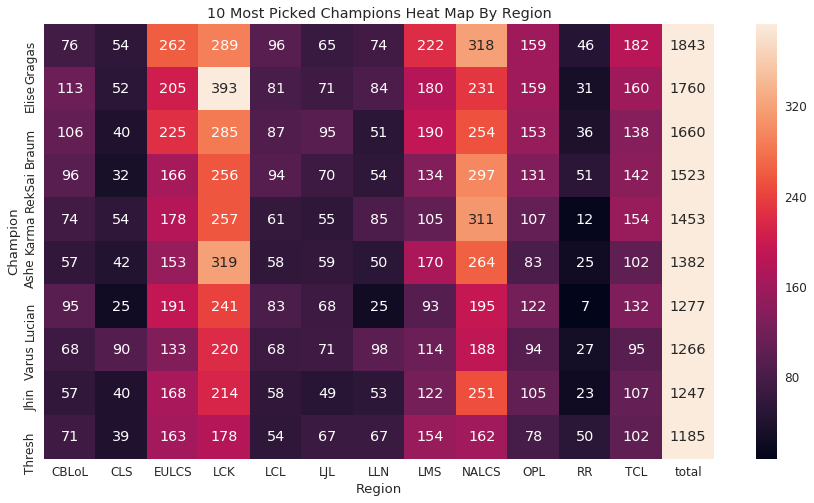

'Gragas'

In [188]:
shape = pd.DataFrame()
for i in champions:
    shape = shape + pd.crosstab( lol2016[i] ,lol2016['League']).fillna(0)

shape[:] = 0
shape = shape.drop(['IEM', 'MSI', 'WC'], axis = 1)
champions_Leagues = shape.copy()

for j in champions:
    champions_Leagues += (shape + pd.crosstab( lol2016[j] ,lol2016['League'])).fillna(0)

    
total = champions_Leagues['CBLoL'].copy()
total[:]=0
for i in champions_Leagues:
    total = (total + champions_Leagues[i]).fillna(0)

champions_Leagues['total'] = total

sns.set(font_scale=1.2)
plt.figure(figsize=(15, 8))
champions_Leagues = champions_Leagues.sort_values(by = 'total', ascending = False).head(10)
sns.heatmap(champions_Leagues, annot=True, vmax=champions_Leagues.loc[:, 'CBLoL':'TCL'].values.max(), vmin=champions_Leagues.loc[:, 'CBLoL':'TCL'].values.min(), fmt='g') 

plt.title('10 Most Picked Champions Heat Map By Region')
plt.xlabel('Region')
plt.ylabel('Champion')
plt.show()
total.idxmax()
